# For an atmosphere with a constant lapse rate  , the pressure as a function of height, z, is described by the following very useful formula: 

$$ p(z) = p_{0} ({\frac{T_{0} - \Gamma z}{T_{0}}})^{\frac{g}{RT}} $$

# Q1 : (a)	Suppose over both the ocean and land, the lapse rate is a typical value of  = 6 K km-1. Plot the pressures from z=0 to z=10 km and their difference. Use height as the Y-coordinate.

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Pressure (hPa)', ylabel='Height (km)'>)

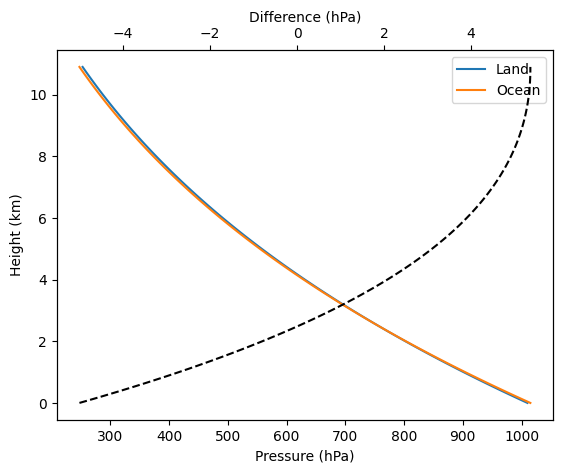

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from metpy.units import units


def calc_pres(p0,T0,tau,z):
    p0 = p0.to('Pa').magnitude
    T0 = T0.to('K').magnitude
    tau = tau.to('K/m').magnitude
    R = (287 * units('J/kg/K')).to_base_units().magnitude
    g = (9.81 * units('m/s^2')).magnitude
    z = z
    p = p0 * ((T0 - (tau*z))/T0)**(g/(R*tau))
    p = p * units('Pa')
    return p

p0_land = 1010 * units('hPa')
T0_land = 303 * units('K')
p0_oce = 1015 * units('hPa')
T0_oce = 298 * units('K')

tau = 6 * units('K/km')


z = (np.arange(0,11,0.1) * units('km')).to('m')



dft = pd.DataFrame(z,columns=['z'])

dft['p_land'] = dft['z'].apply(lambda x : calc_pres(p0_land,T0_land,tau,x).to('hPa').magnitude)
dft['p_oce'] = dft['z'].apply(lambda x: calc_pres(p0_oce,T0_oce,tau,x).to('hPa').magnitude)

dft['diff'] = dft['p_land'] - dft['p_oce']


def plot_pres(df):
    fig,ax = plt.subplots()
    dft['z'] = dft['z']/1000
    ax.plot(df['p_land'],df['z'],label='Land')
    ax.plot(df['p_oce'],df['z'],label='Ocean')
    ax2 = ax.twiny()
    ax2.plot(df['diff'],df['z'],label='Difference',linestyle='--',
             color='black')
    ax.set_xlabel('Pressure (hPa)')
    ax.set_ylabel('Height (km)')
    ax2.set_xlabel('Difference (hPa)')
    ax.legend()
    return fig,ax

plot_pres(dft)




# b) Now suppose the air over the land has a lot of moist convection. The latent heat release in the middle levels changes the environmental lapse rate to 3 K km-1. Show the pressures and their difference (use height as the vertical coordinate). What is the z = 10 km pressure difference now?                                                

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Pressure (hPa)', ylabel='Height (km)'>)

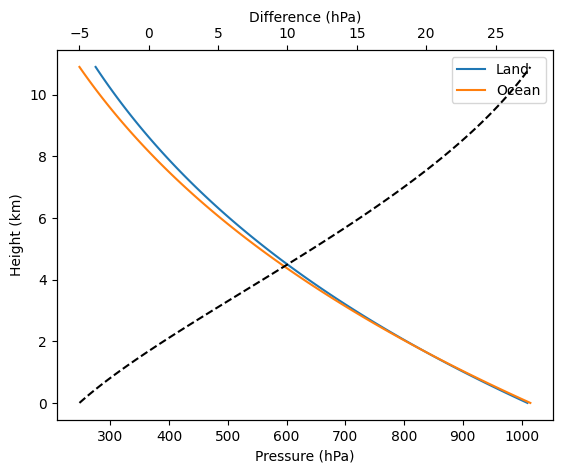

In [31]:

tau_land = 3 * units('K/km')
tau_oce = 6 * units('K/km')

dft = pd.DataFrame(z,columns=['z'])

dft['p_land'] = dft['z'].apply(lambda x : calc_pres(p0_land,T0_land,tau_land,x).to('hPa').magnitude)
dft['p_oce'] = dft['z'].apply(lambda x: calc_pres(p0_oce,T0_oce,tau_oce,x).to('hPa').magnitude)

dft['diff'] = dft['p_land'] - dft['p_oce']

plot_pres(dft)